In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [84]:
depth_smpl = Image.open("/NAS5/speech/user/richamishra/champ/data/motions/motion-01/depth_smpl/0001.png")
depth_zoe = Image.open("/NAS5/speech/user/richamishra/champ/data/motions/motion-01/depth_zoe/0001.png")

depth_smpl = np.array(depth_smpl)
depth_zoe = np.array(depth_zoe)
rgb = np.array(Image.open("/NAS5/speech/user/richamishra/champ/data/motions/motion-01/images/0001.png"))

In [2]:
for i in range(1, 2):
    
    depth_zoe = Image.open("/NAS5/speech/user/richamishra/champ/data/motions/motion-01/depth_zoe/{:04}.png".format(i))
    depth_zoe = np.array(depth_zoe)
    mask = depth_zoe[:,:,0]>101
    depth = (depth_zoe[:,:,0]-101)*mask
    depth = (depth-depth.min())/(depth.max()-depth.min())*255
    depth = depth.astype(np.uint8)
    
    Image.fromarray(depth).save("/NAS5/speech/user/richamishra/champ/data/motions/motion-01/depth/{:04}.png".format(i))
    

In [4]:
depth_smpl.max(), depth_smpl.min()

(255, 0)

In [5]:
depth_zoe.max(), depth_smpl.min()

(255, 0)

In [6]:
depth_smpl[0,0], depth_zoe[0,0]

(0, array([  8,   8,   8, 255], dtype=uint8))

In [83]:
depth_smpl.shape, depth_zoe.shape

((512, 512), (512, 512))

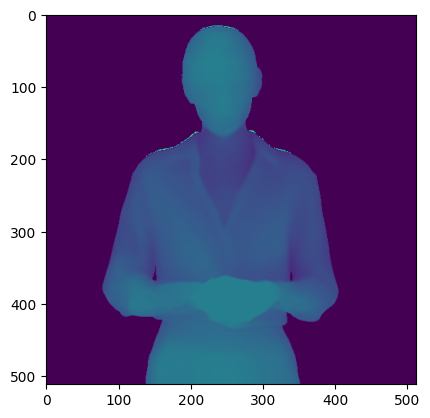

In [88]:
# mask = depth_zoe[:,:,0]>101
mask = rgb.sum(2)<240*3
depth = (depth_zoe[:,:,0]-145)*mask
#depth = depth-10
depth = (depth-depth.min())/(depth.max()-depth.min())*255
plt.imshow(depth)

In [87]:
depth.max(), depth.min()

(255.0, 0.0)

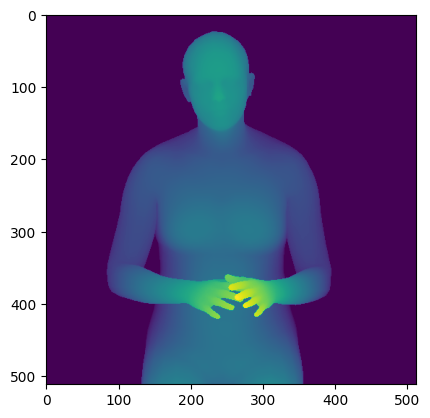

In [16]:
plt.imshow(depth_smpl)

In [90]:
depth_smpl[500,281], depth[500,281], depth_smpl[280,281], depth[280,281]

(103, 104.0, 103, 66.0)

In [54]:
for i in range(1,139):
    
    pathname = "/NAS5/speech/user/richamishra/champ/data/motions/motion-01/images/{:04}.png".format(i)
    
    rgb1 = np.array(Image.open(pathname))/255.0
    alpha = np.array(Image.open("/NAS5/speech/user/richamishra/champ/data/motions/motion-01/alpha/{:04}.png".format(i))).reshape((512,512,1))/255.0
    ref_image = np.array(Image.open("/NAS5/speech/user/richamishra/champ/data/ref_images/blue.png"))/255.0
    
    test = (ref_image*alpha + (1-alpha)*rgb1)*255.0
    Image.fromarray(test.astype(np.uint8)).save(pathname.replace('images', 'imgs_masked'))

In [50]:
alpha.max(), alpha.min(), rgb1.max(), rgb1.min(), ref_image.max(), ref_image.min()

(1.0, 0.0, 255, 0, 255, 0)

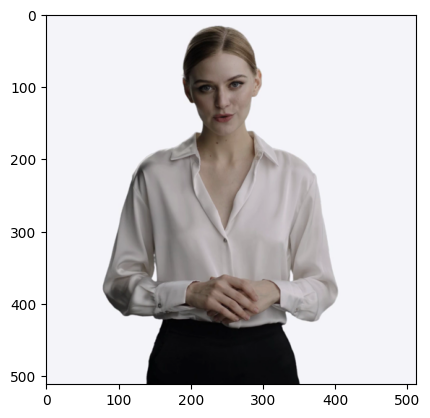

In [89]:
plt.imshow(rgb)